# Simple Linear Regression Example - Segmentation

###### Andrew Cachia, Nov 2018

#### Imports

In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Data

In [3]:
car_data_csv = pd.read_csv('car_data.csv')
car_data_csv


,Class,Kilometres,Market Value,Year of Manufacture,Model,Extra
0,201819,47777,6700.0,2011,VW Polo,"1.2, Petrol, 5DR"
1,201819,234676,700.0,1998,Toyota Corolla,"1.48, Petrol, 5DR"
2,201819,74717,1000.0,1999,Fiat Punto,"1.3, Petrol, 5DR"
3,201819,49700,9300.0,2010,Golf mk 6,"2.0, Diesel, 5DR"
4,201819,116800,16500.0,2013,BMW 320D,"2.0, Diesel, 5DR"
5,201819,123588,6000.0,2009,Fiat Grande Punto,"1.2, LPG, 5DR"
6,201819,256000,700.0,1997,Toyota Starlet,"1.5, Diesel, 5DR"
7,201819,85690,4400.0,2002,BMW 3 Series E46,1.9 Petrol 5DR
8,201819,165000,1400.0,2002,Citroen Picasso,"1.6, Petrol, 5DR"
9,201819,122310,4500.0,2005,MG ZR,"1.4, Petrol, 3DR"


In [4]:
x = car_data_csv.loc[:, ("Kilometres")]
y = car_data_csv.loc[:, ("Market Value")]

## Gradient

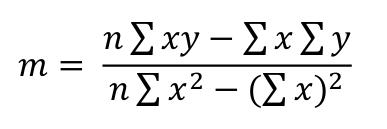

In [5]:
Image(filename='equation_gradient.png')

## Intercept

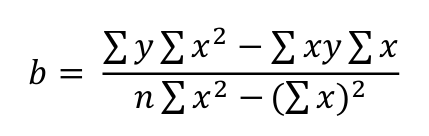

In [6]:
Image(filename='equation_intercept.png')

In [7]:
def mb(x,y):
    n = len(x)
    sum_xy = 0;
    for i in range(n):
        sum_xy = sum_xy + (x[i] * y[i]);
    sum_x2 = sum(i*i for i in x);
    
    numerator = (n * sum_xy) - (sum(x) * sum(y));
    denominator = (n * sum_x2) - (sum(x)**(2));
    m = numerator / denominator;
    print("m: {}".format(m))
    
    numerator = (sum(y) * sum_x2) - (sum_xy * sum(x))
    denominator = (n * sum_x2) - sum(x)**(2)
    b = numerator / denominator;
    print("b: {}".format(b))
    
    return m,b

# Segmented

In [8]:
segment_threshold = 100000

nx = np.array(x)
ny = np.array(y)

arr = np.column_stack((nx,ny));

arr_lower = [i for i in arr if i[0] < segment_threshold ]
arr_upper = [i for i in arr if i[0] >= segment_threshold ]

arr_lower_x = [i[0] for i in arr_lower]
arr_lower_y = [i[1] for i in arr_lower]
arr_upper_x = [i[0] for i in arr_upper]
arr_upper_y = [i[1] for i in arr_upper]

m_lower,b_lower = mb(arr_lower_x, arr_lower_y)
m_upper,b_upper = mb(arr_upper_x, arr_upper_y)

m: -0.07397015889717551
b: 13545.154766150219
m: -0.06619480020602558
b: 16035.90201416078


#### Best fit line dimensions

In [9]:
#segment1
sx1 = 0; sy1 = b_lower;
sx2 = segment_threshold; sy2 = m_lower * sx2 + b_lower;

#segment2
sx3 = segment_threshold; sy3 = m_upper * sx3 + b_upper;
sx4 = 250000; sy4 = m_upper * sx4 + b_upper;

#### Plot

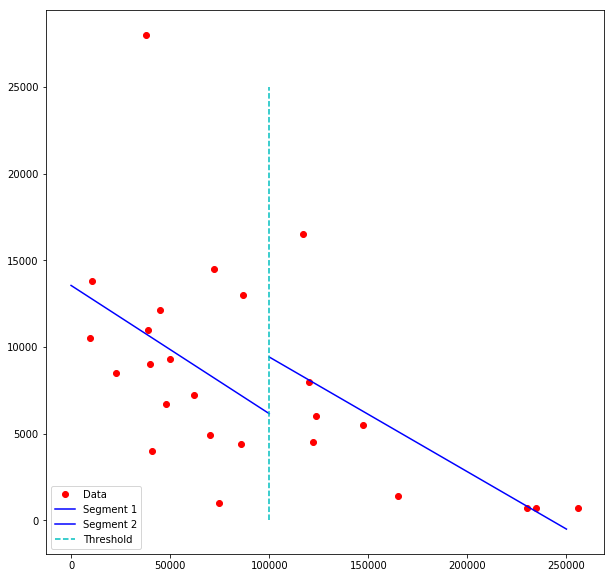

In [10]:
fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, 'ro', label='Data')
plt.plot([sx1,sx2],[sy1,sy2],'b', label='Segment 1')
plt.plot([sx3,sx4],[sy3,sy4],'b', label='Segment 2')
plt.plot([segment_threshold,segment_threshold],[0,25000],'c--', label='Threshold')
plt.legend(loc=3)

## Pearsons Correlation Coefficient:

In [11]:
seg1_coeff = np.corrcoef(arr_lower_x, arr_lower_y)[0, 1]
seg2_coeff = np.corrcoef(arr_upper_x, arr_upper_y)[0, 1]
print(seg1_coeff)
print(seg2_coeff)

-0.28911190642135
-0.7270017104812018


# Testing Data

In [12]:
car_test_data_csv = pd.read_csv('car_test_data.csv')

test_x = car_test_data_csv.loc[:, ("Kilometers")]
test_y = car_test_data_csv.loc[:, ("Price")]

car_test_data_csv

,Kilometers,Price
0,14822,16830
1,31286,12600
2,42533,6570
3,45312,6030
4,46863,9630
5,57000,5490
6,60000,6930
7,71010,5220
8,84000,7200
9,85697,2700


In [13]:
count = 0;
square_errors = []
for t in test_x:
    if t < segment_threshold:
        result = m_lower*t + b_lower
    else:
        result = m_upper*t + b_upper
    
    expected = test_y[count];
    square_errors.append((result - expected)**(2))
    print("Km: {}; \tPredicted price: {}; \tActual price: {}".format(t,result,expected))
    count += 1
    
mse = sum(square_errors) / len(square_errors);
print("\nMSE: {}".format(mse));

Km: 14822; 	Predicted price: 12448.769070976283; 	Actual price: 16830
Km: 31286; 	Predicted price: 11230.924374893186; 	Actual price: 12600
Km: 42533; 	Predicted price: 10398.981997776653; 	Actual price: 6570
Km: 45312; 	Predicted price: 10193.418926201402; 	Actual price: 6030
Km: 46863; 	Predicted price: 10078.691209751883; 	Actual price: 9630
Km: 57000; 	Predicted price: 9328.855709011215; 	Actual price: 5490
Km: 60000; 	Predicted price: 9106.94523231969; 	Actual price: 6930
Km: 71010; 	Predicted price: 8292.533782861785; 	Actual price: 5220
Km: 84000; 	Predicted price: 7331.661418787477; 	Actual price: 7200
Km: 85697; 	Predicted price: 7206.13405913897; 	Actual price: 2700
Km: 97000; 	Predicted price: 6370.049353124195; 	Actual price: 3600
Km: 118000; 	Predicted price: 8224.915589849761; 	Actual price: 1350
Km: 118895; 	Predicted price: 8165.671243665368; 	Actual price: 3690
Km: 142278; 	Predicted price: 6617.838230447871; 	Actual price: 1080
Km: 178000; 	Predicted price: 4253.22757